In [1]:
import altair as alt

import pandas as pd

# Data visualization
* Introduction
    * Why data visualization?
    * What is data visualization?
* Grammar of graphics:
    1. Data
    2. Transformations
    3. Marks
    4. Encodings
    5. Scales
    6. Guides
* Creating an effective visualization
    * Effective in terms of...
    * ...human perception and data (type)
    * ...research question
    * ...audience & message
* Visualization tools


This presentation was strongly influenced by Jake VanderPlas' talk: [Thinking about visualization](https://www.youtube.com/watch?v=vTingdk_pVM)
    
    


# Introduction

## Why data visualization?

<br>

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/why_data_viz.png?raw=true">

## What is data visualization?

A graphical representation of the data.

Data are **encoded** into a visual representation that *yields intuition*. Data are represented by **marks**, and **scales** map encodings to values.

**Florence Nightingale: Diagram of the causes of mortality in the army in the East (1858)**

<img src="https://images.squarespace-cdn.com/content/v1/571a9b3cd51cd4f1ca1c03b5/1560869294779-VZJUB6GPGL32CDO0IPIJ/Nightingale-mortality.jpg?format=1000w">

**John Snow: Cholera outbreak London (1854)**

<img src="http://www.visualcapitalist.com/wp-content/uploads/2018/04/john-snow-cholera-map-huge.jpg">

[source](https://www.visualcapitalist.com/wp-content/uploads/2018/04/data-viz-cholera.html)


# Grammar of graphics

Data are **encoded** into a visual representation that *yields intuition*. Data are represented by **marks**, and **scales** map encodings to values.

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/grammar_of_graphics.png?raw=true">

Let's get acquainted with these terms...

## Data

This one is as straightforward as it sounds, it is your dataset! The row index, the columns, and the values themselves.

For illustration purposes, we will use a dataset we know by heart.

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/NHameleers/dtz2025-datasets/master/titanic.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Transformation

A transformation of the data before visualizing it.

Many different types of transformations:
* Aggregate transformations, such as mean(), sum()
* Bin transformations, like we binned age with pd.qcut()
* Filter transformations, like we selected a subset of rows where Pclass == 1
* [And many more](https://altair-viz.github.io/user_guide/transform/index.html)

In [3]:
# this groupby is an aggregate transformation example
titanic.groupby(['Pclass', 'Sex']).mean()['Survived']


C:\Users\niels.hameleers\AppData\Local\Temp\ipykernel_4364\310097975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(['Pclass', 'Sex']).mean()['Survived']


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## Marks

This one was in the definition! *Data are represented by marks*

Getting acquainted is best done by showing some examples.

**Mark point**: data are represented by points

In [4]:
alt.Chart(titanic).mark_point().encode(
    x='Sex',
    y='mean(Survived)',
    column='Pclass'
)

alt.Chart(...)

**Mark bar**: data are represented by bars

In [5]:
alt.Chart(titanic).mark_bar().encode(
    x='Sex',
    y='mean(Survived)',
    column='Pclass'
)

alt.Chart(...)

**Mark line**

In [6]:
alt.Chart(titanic).mark_line().encode(
    x='Sex',
    y='mean(Survived)',
    column='Pclass'
)

alt.Chart(...)

**Mark rectangle**

In [7]:
alt.Chart(titanic).mark_rect().encode(
    x='Pclass:O',
    y='Sex',
    color='mean(Survived)',
).properties(
    width=300,
    height=200
)

alt.Chart(...)

## Encodings

In the definition: *Data are **encoded** into a visual representation that *yields intuition*.

How can data be encoded?
* 2D position
* Size
* Color value
* Color hue
* Shape
* Texture

Let's take a closer look at this

**2D position**

This one is so obvious we might even overlook it, but the horizontal and vertical position of the data mark intuitively tells us something. So 2D position can translate to:
* x-axis
* y-axis

In [8]:
# In the graph below:
#  Proportion survived is encoded to the y-axis
#  Sex is encoded to the x-axis

alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    x='Sex',
)

alt.Chart(...)

But we can also split the graph further using 2D position. This is called faceting.

Like using columns (or rows) to encode data on Pclass.

In [9]:
# In the graph below:
#  Proportion survived is encoded to the y-axis
#  Sex is encoded to the x-axis
#  Pclass is encoded to facet column

alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O'
)

alt.Chart(...)

**Size**

In [10]:
# In the graph below:
#  Proportion survived is encoded to the y-axis
#  Sex is encoded to the x-axis
#  Pclass is encoded to facet column
#  Number of passengers is encoded to size of mark

alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O',
    size='count()'
)

alt.Chart(...)

**Color value**


In [11]:
# In the graph below:
#  Proportion survived is encoded to color value
#  Sex is encoded to the y-axis
#  Pclass is encoded to x-axis

alt.Chart(titanic).mark_rect().encode(
    x='Pclass:O',
    y='Sex',
    color='mean(Survived)',
).properties(
    width=300,
    height=200
)

alt.Chart(...)

**Color hue**

In [12]:
# In the graph below:
#  Proportion survived is encoded to the y-axis
#  Sex is encoded to the x-axis and color hue
#  Pclass is encoded to facet column

alt.Chart(titanic).mark_bar().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O',
    color='Sex'
)

alt.Chart(...)

**Shape**

In [13]:
# In the graph below:
#  Proportion survived is encoded to the y-axis
#  Sex is encoded to shape of mark
#  Pclass is encoded to facet column

alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    column='Pclass:O',
    shape='Sex'
)

alt.Chart(...)

## Scale

_"Functions that map data to visual scales"_

Think of:
* Numbers to a number line
* The minimum and maximum of that line
* Float numbers mapped to integer axis
* Categories to different colors (female to blue, male to orange)

In [14]:
# axis can start at non-zero value

alt.Chart(titanic).mark_point().encode(
    alt.Y('count()'),
    x='Sex',
    color='Sex',
) | alt.Chart(titanic).mark_point().encode(
    alt.Y('count()', scale=alt.Scale(zero=False)),
    x='Sex',
    color='Sex',
)

alt.HConcatChart(...)

In [15]:
# or you can choose minimum and maximum yourself

alt.Chart(titanic).mark_point().encode(
    alt.Y('count()', scale=alt.Scale(domain=(250, 650))),
    x='Sex',
    color='Sex',
)

alt.Chart(...)

## Guide

Visualization of scales (axes, legend, etc)

Without guides, a chart would be pretty hard to read...

In [16]:
alt.Chart(titanic).mark_point().encode(
    alt.Y('count()', axis=None),
    alt.X('Sex', axis=None),
    color=alt.Color('Sex', legend=None),
).properties(title='A chart without guides'
).configure_view(strokeOpacity=0)

alt.Chart(...)

In [17]:
alt.Chart(titanic).mark_point().encode(
    alt.Y('count()'),
    alt.X('Sex'),
    color=alt.Color('Sex'),
).properties(title='A chart with guides')


alt.Chart(...)

**Grammar of graphics in summary example**:

**Data**...

(...sometimes first **transformed**)

...are represented by **marks**

...which are encoded to a number of **encodings**

...which are mapped to visual **scales**

...and accompanied by a **guide**.

**Grammar of graphics in summary example**:

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/grammar_of_graphics_syntax.PNG?raw=true">

In [18]:
alt.Chart(titanic).mark_bar().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O',
    color='Sex'
).properties(
    width=150,
    height=350
)

alt.Chart(...)

**Contents**

* Introduction
    * Why data visualization?
    * What is data visualization?
* Grammar of graphics:
    1. Data
    2. Transformations
    3. Marks
    4. Encodings
    5. Scales
    6. Guides
* **Creating an effective visualization** <--
    * Effective in terms of
    * human perception and data (type)
    * research question
    * audience/framing
* Visualization tools

# Making an effective visualisation

With so many options to choose from, how do we create an effective visualization?

The underlying question being:

_"Which encoding, mark, and scale are most effective?"_

Effective in terms of...?

* **human perception**

* **the data (type)**

* **the type of research question**

* **the audience and the message to convey**

## Human perception and data type

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/bertin_semiology.png?raw=true">

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/bertin_levels_of_organization.png?raw=true">

## Type of research question

Questions can be related to themes such as:

1. Distribution
2. Ranking
3. Part of a whole
4. Evolution
5. Correlation
6. Geographic
7. Relations --> Network

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/question_to_viz1.png?raw=true">

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/question_to_viz2.png?raw=true">

[source](https://www.oreilly.com/library/view/making-data-visual/9781491960493/)

## The audience and message to convey

Audience matters. For example, consider the differences between:

* Fellow scientists
* Policymakers
* Citizens reading the news

Moreover, you can convey a lot of different messages with one dataset when being creative with scales and guides.

Just don't take the framing too far...

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/bad_viz_violent_crime.jpg?raw=true">

See https://viz.wtf/ for more examples of visualizations that make no sense

# Tools/modules

* Matplotlib
* Altair
* Other tools

## Matplotlib

<img src="">

[Matplotlib](https://matplotlib.org/) is a very extensive visualization module in python. It has been around for 19 years and is therefore a very mature and stable library.

Pros:
* Very flexible. You can adjust even the smallest detail in a visualization
* Used by pandas plotting
* Many predefined styles (including xkcd comic style!)

Cons:
* Can feel and look a bit arcane
* Interactivity is possible, but not always easy to implement
* You always need to mould your data in the shape the visualization requires

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

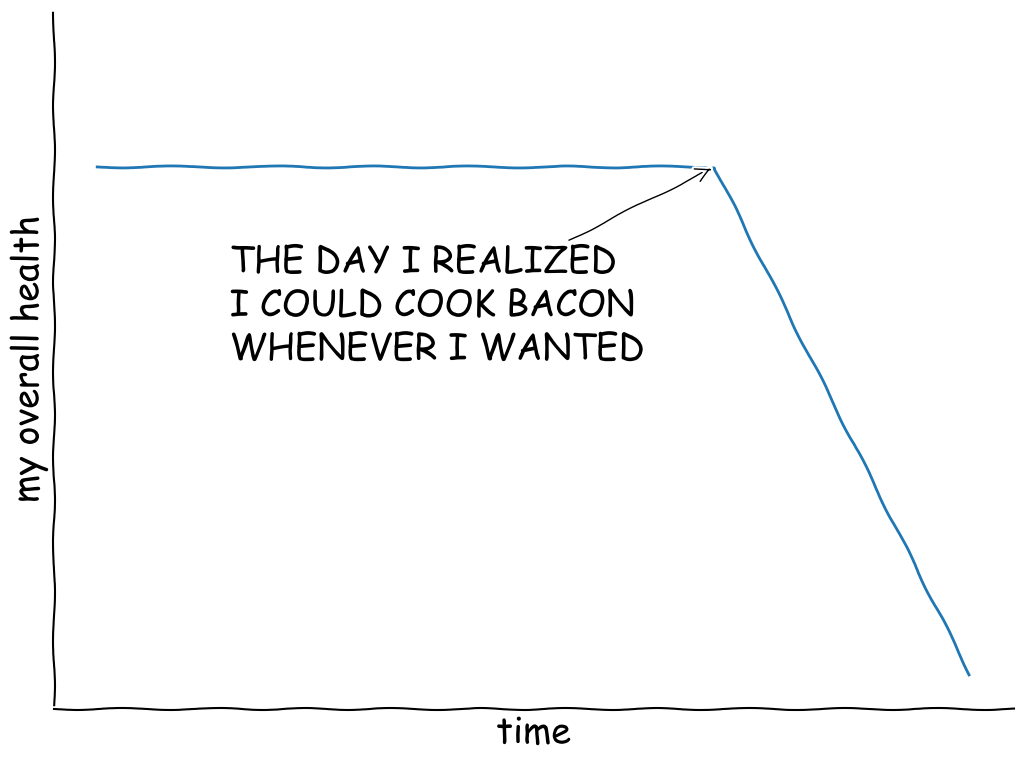

In [19]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd(scale=1, length=100, randomness=2):
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10), size=26)

    ax.plot(data)

    ax.set_xlabel('time', size=26)
    ax.set_ylabel('my overall health', size=26)

## Altair



[Altair](https://altair-viz.github.io/index.html) is a declarative statistical visualization library for Python, based on Vega and Vega-Lite (javascript visualization libraries). Altair’s API (syntax) is simple, friendly and consistent and built on top of the powerful Vega-Lite **visualization grammar.** 

Pros:
* The API/syntax corresponds to the grammar of graphics, which makes the programming intuitive and simpler
* Good default settings corresponding with data type
* Great features for interactivity

Cons:
* Does not handle large datasets well (since all the data are stored in json format in the image)
* Not every minor detail is customizable (altough in practice this might rarely be a problem)

## Other tools

There are a lot of visualization modules in python:
<img src="https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2018/04/Python_Visualization_Landscape.jpeg?w=452&ssl=1" width="800">

Beyond Python:
The Excels of data visualization (Tableau, Power BI, Qlik) allow for quick exploration of data for those who cannot program and are commonly used in business settings for analytics and dashboards.

# Key takeways

* There is a grammar to graphics
* When creating visualizations, think about the most effective marks, encodings and scales.
* Position encoding gives very strong intuition, use this first whenever possible.
* Pick the visualization that fits your question type, audience and message.

# Hans Rosling, another visualization legend

Watch [the 4-minute video](https://www.youtube.com/watch?v=Z8t4k0Q8e8Y) and see which elements from the grammar of graphics you recognize. How do they look in the video?

* Data
* Transformation
* Marks
* Encodings
* Scales
* Guides

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/rosling.PNG?raw=true">